In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
filename="timestamps_run424204606.csv"
inputrate=100E3
daqclock=80E6
runname = filename[11:-4]

In [24]:
df = pd.read_csv(filename)
df.columns
if filename == "timestamps_run424204604.csv" : 
    df = df[df.index>700000].reset_index()
    df["EventNr"] = df["EventNr"] - df["EventNr"][0]
    df["TriggerNr"] = df["TriggerNr"] - df["TriggerNr"][0]
df.head()

,EventNr,TriggerNr,ALPIDE_plane_4,ALPIDE_plane_1,ALPIDE_plane_3,ALPIDE_plane_5,ALPIDE_plane_2,ALPIDE_plane_0
0,2,0,16706669528,16706728258,16683529382,16706611592,16706789417,16706456704
1,3,1,16706670328,16706729058,16683530182,16706612392,16706790217,16706457504
2,4,2,16706671128,16706729858,16683530982,16706613192,16706791017,16706458304
3,5,3,16706671928,16706730658,16683531782,16706613992,16706791817,16706459104
4,6,4,16706672728,16706731458,16683532582,16706614792,16706792617,16706459904


In [25]:
daqs = ["ALPIDE_plane_0","ALPIDE_plane_1","ALPIDE_plane_2","ALPIDE_plane_3",
        "ALPIDE_plane_4","ALPIDE_plane_5"]
for daq in daqs:
    df[daq+"_zero"] = df[daq] - df[daq][0]
    df[daq+"_diff"] = (df[daq+"_zero"] - df["ALPIDE_plane_0_zero"])/daqclock*1E6
    df[daq+"_sec"] = df[daq+"_zero"]/daqclock
df["time"] = df["TriggerNr"]/inputrate
df.head()

,EventNr,TriggerNr,ALPIDE_plane_4,ALPIDE_plane_1,ALPIDE_plane_3,ALPIDE_plane_5,ALPIDE_plane_2,ALPIDE_plane_0,ALPIDE_plane_0_zero,ALPIDE_plane_0_diff,...,ALPIDE_plane_3_zero,ALPIDE_plane_3_diff,ALPIDE_plane_3_sec,ALPIDE_plane_4_zero,ALPIDE_plane_4_diff,ALPIDE_plane_4_sec,ALPIDE_plane_5_zero,ALPIDE_plane_5_diff,ALPIDE_plane_5_sec,time
0,2,0,16706669528,16706728258,16683529382,16706611592,16706789417,16706456704,0,0.0,...,0,0.0,0.00000,0,0.0,0.00000,0,0.0,0.00000,0.00000
1,3,1,16706670328,16706729058,16683530182,16706612392,16706790217,16706457504,800,0.0,...,800,0.0,0.00001,800,0.0,0.00001,800,0.0,0.00001,0.00001
2,4,2,16706671128,16706729858,16683530982,16706613192,16706791017,16706458304,1600,0.0,...,1600,0.0,0.00002,1600,0.0,0.00002,1600,0.0,0.00002,0.00002
3,5,3,16706671928,16706730658,16683531782,16706613992,16706791817,16706459104,2400,0.0,...,2400,0.0,0.00003,2400,0.0,0.00003,2400,0.0,0.00003,0.00003
4,6,4,16706672728,16706731458,16683532582,16706614792,16706792617,16706459904,3200,0.0,...,3200,0.0,0.00004,3200,0.0,0.00004,3200,0.0,0.00004,0.00004


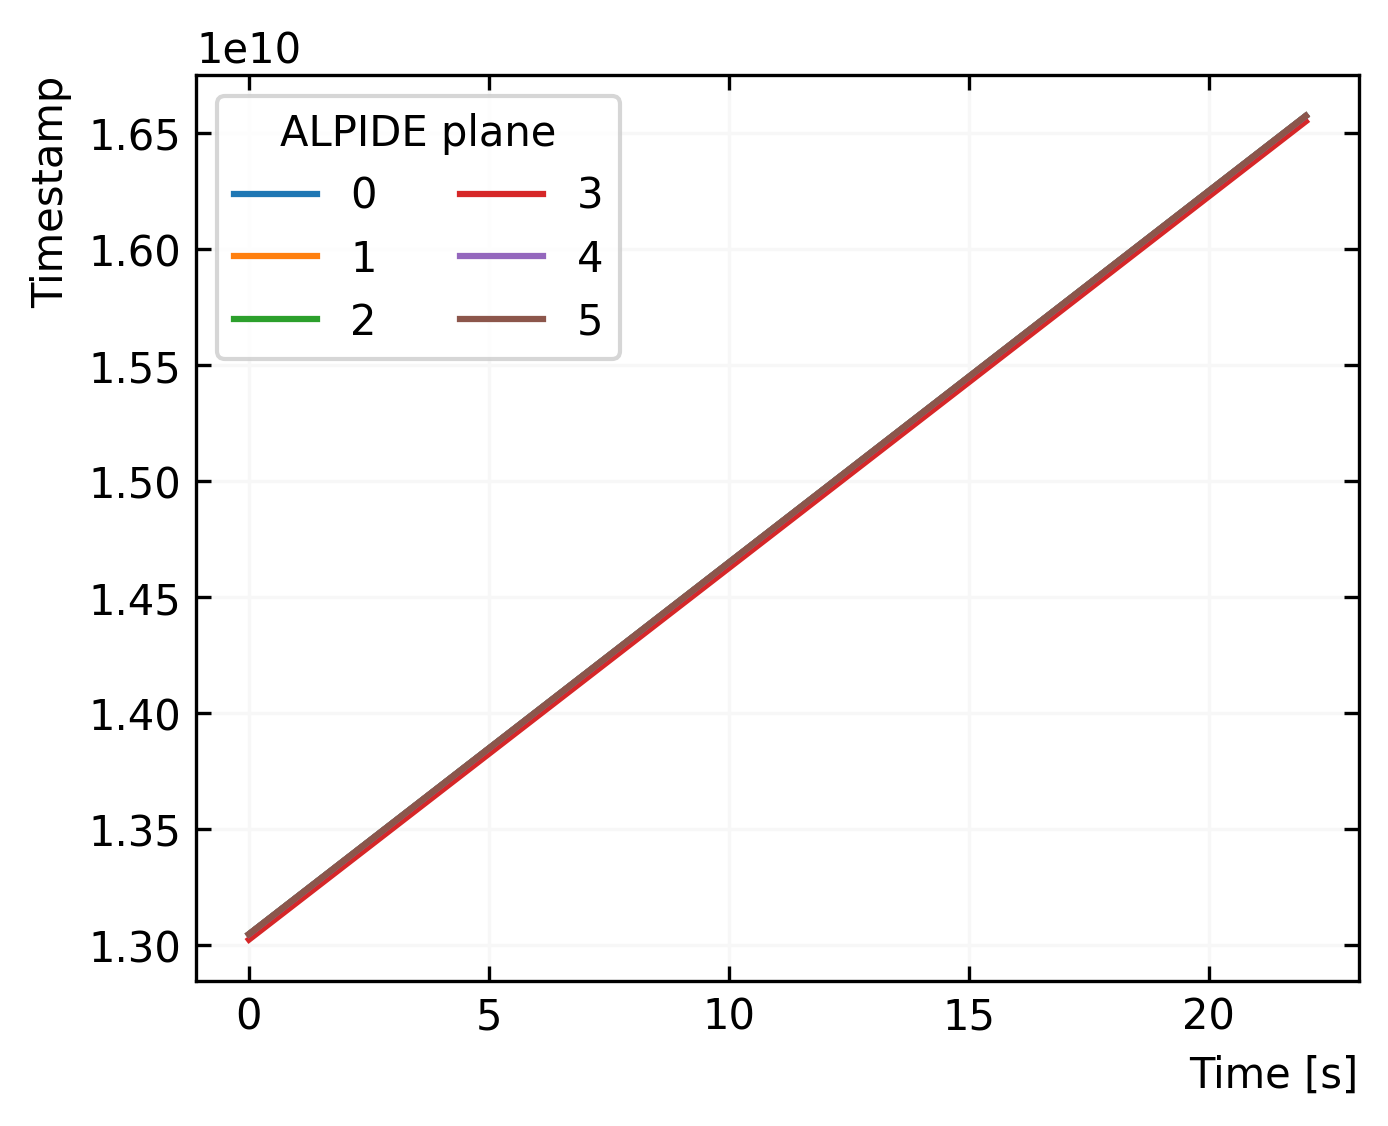

In [5]:
plt.figure(figsize=(5,4),dpi=300)

ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

for daq in daqs:
    df.plot(x="time",y=(daq),ax=ax,label=daq[-1])
    
ax.set_xlabel("Time [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Timestamp",horizontalalignment="right",y=1.0)
ax.legend(title="ALPIDE plane",ncols=2)

plt.grid(visible=True,which="both",axis='both', color='0.97')
plt.savefig(runname+"_timestamps_vs_time.png")

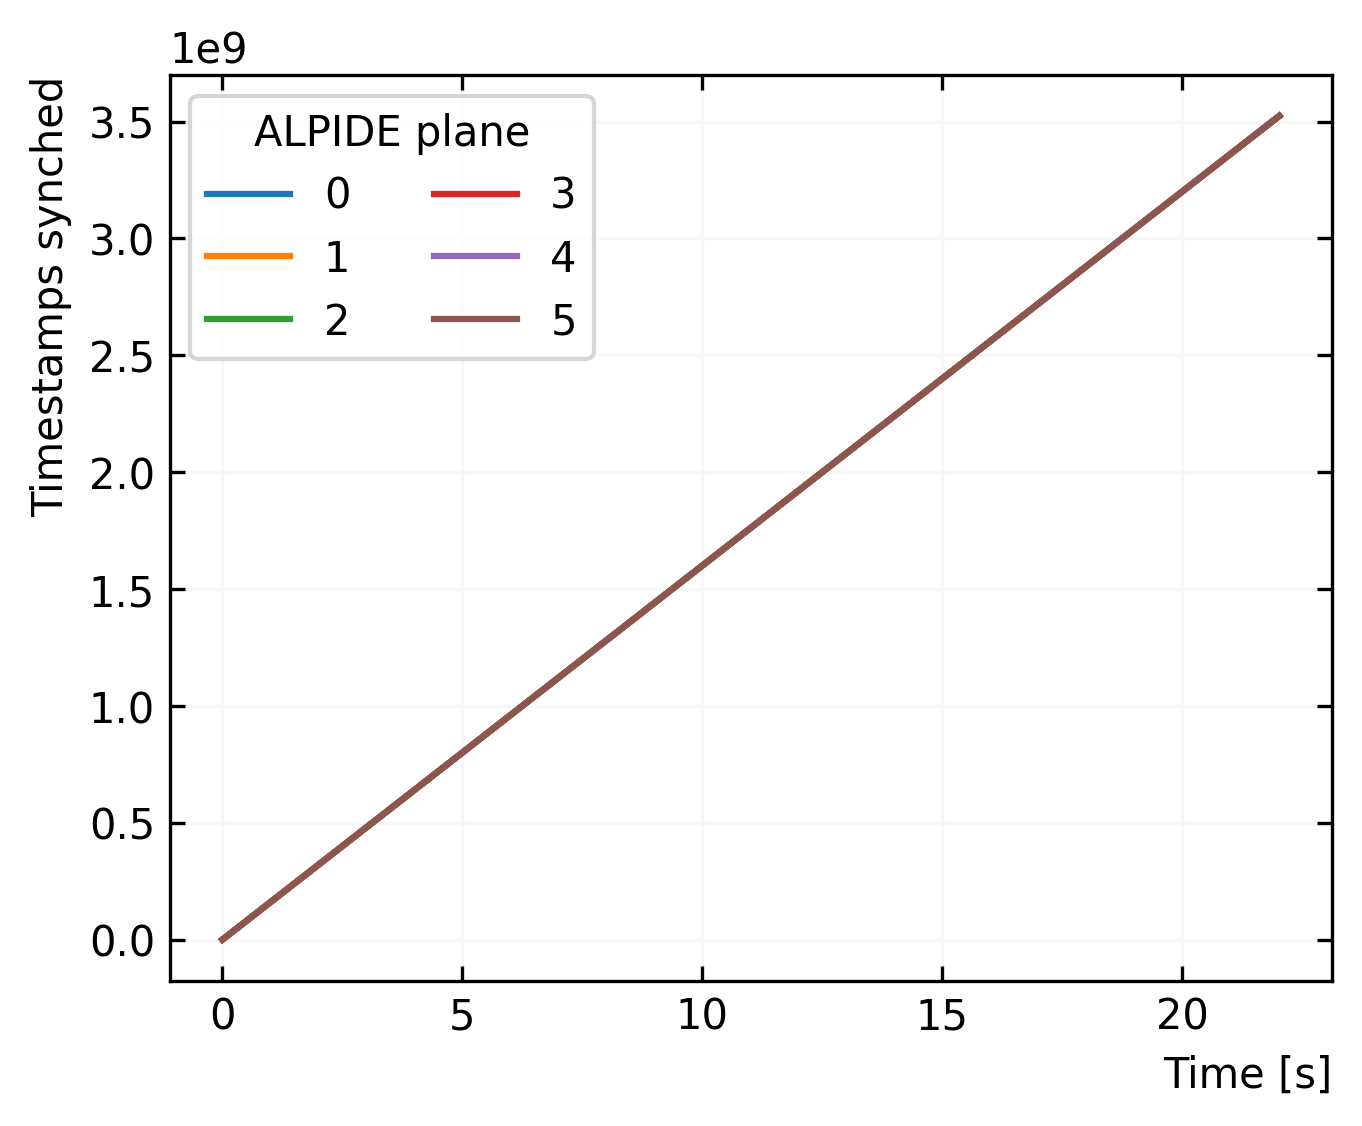

In [6]:
plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

for daq in daqs:
    df.plot(x="time",y=(daq+"_zero"),ax=ax,label=daq[-1])
    
ax.set_xlabel("Time [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Timestamps synched",horizontalalignment="right",y=1.0)
ax.legend(title="ALPIDE plane",ncols=2)

plt.grid(visible=True,which="both",axis='both', color='0.97')
plt.savefig(runname+"_synched_vs_time.png")

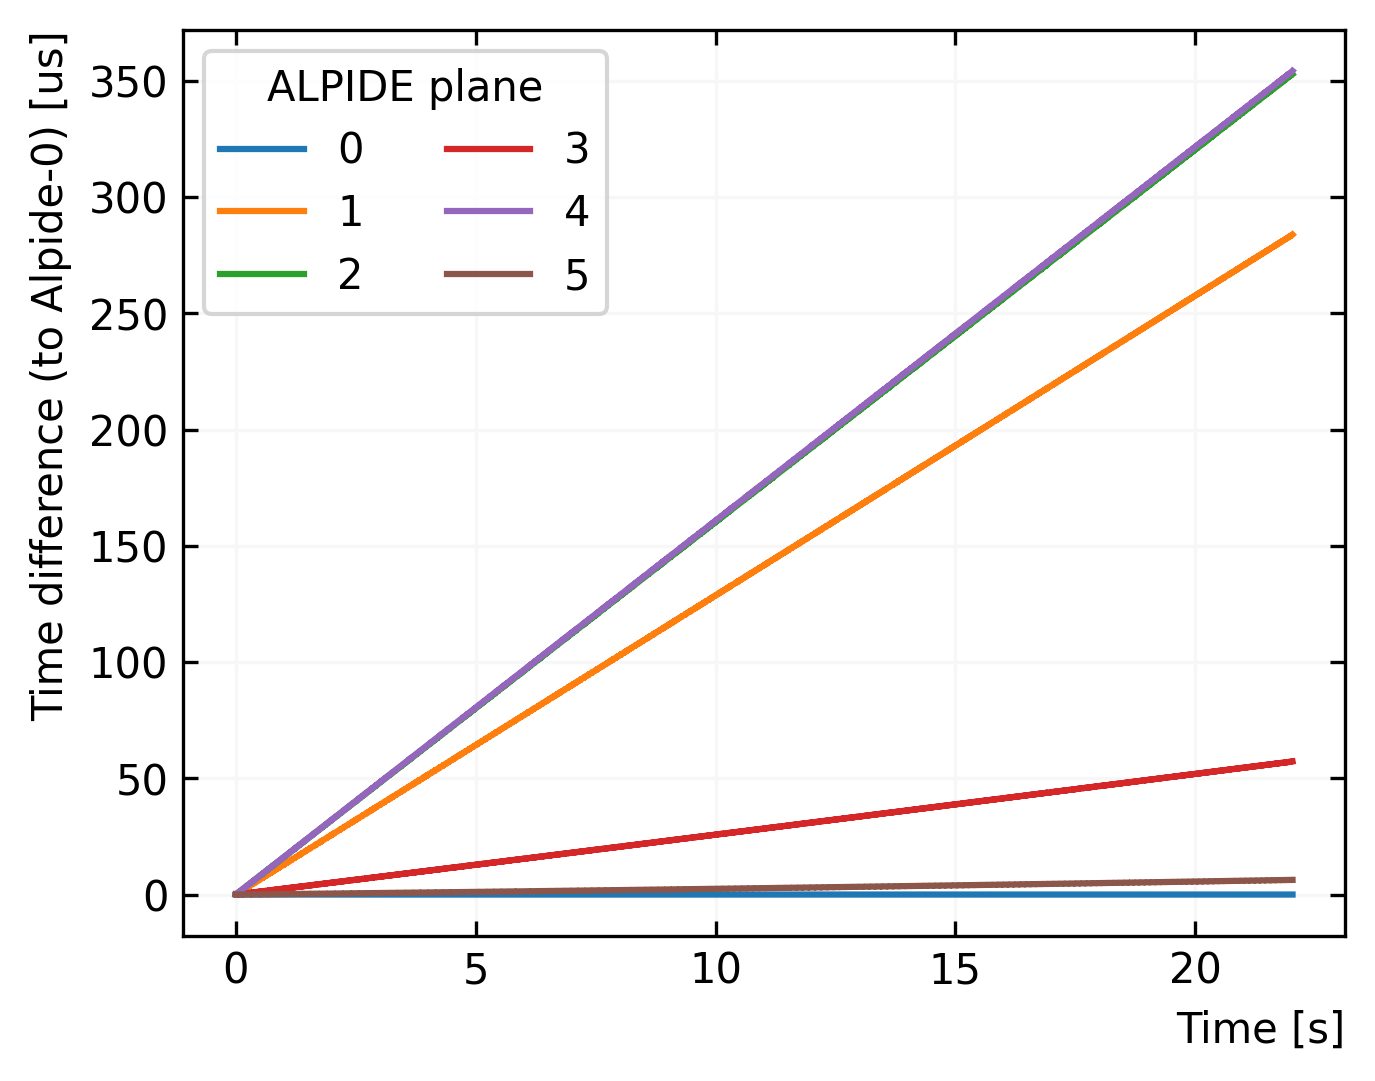

In [7]:
plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

for daq in daqs:
    df.plot(x="time",y=(daq+"_diff"),ax=ax,label=daq[-1])
    
ax.set_xlabel("Time [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Time difference (to Alpide-0) [us]",horizontalalignment="right",y=1.0)
ax.legend(title="ALPIDE plane",ncols=2)

plt.grid(visible=True,which="both",axis='both', color='0.97')
plt.savefig(runname+"_difference_vs_time.png")

In [8]:
tmp_range = df["ALPIDE_plane_0"][len(df.index)-1] - df["ALPIDE_plane_0"][0]
run_time = tmp_range / daqclock
lag = df["ALPIDE_plane_2_diff"][len(df.index)-1] / daqclock
run_time

44.052136275

In [26]:
diffs = df.ALPIDE_plane_0.diff().to_numpy()

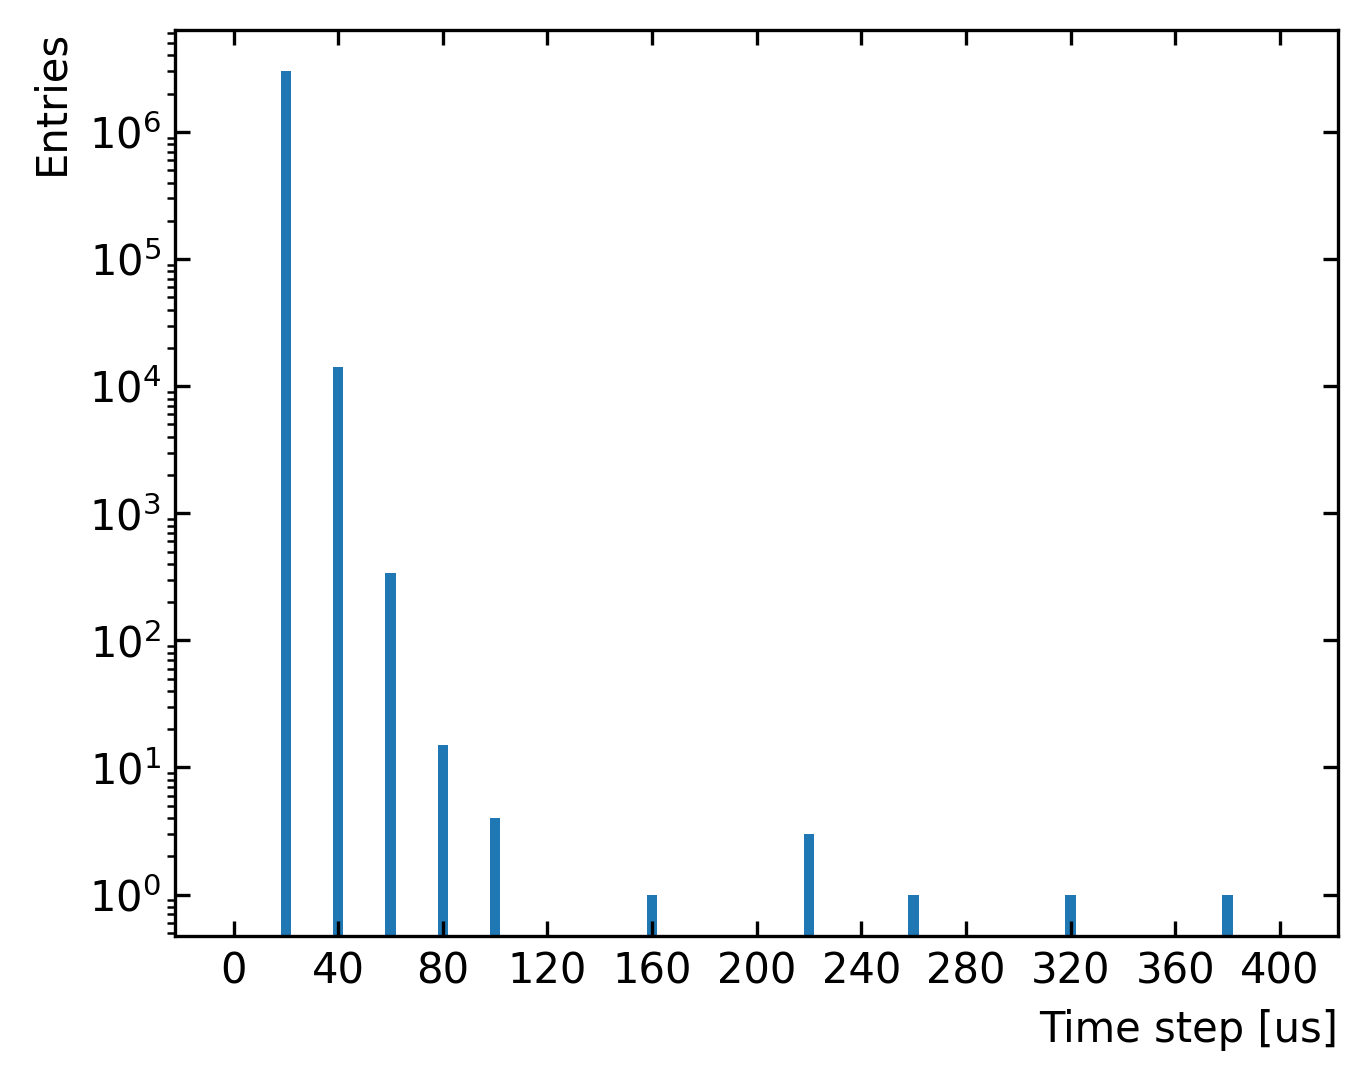

In [27]:
plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)
plt.hist(diffs/40,101,[-2,402])

ax.set_xlabel("Time step [us]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Entries",horizontalalignment="right",y=1.0)
#ax.set_xlim([0,4000])
plt.xticks(np.arange(0, 440, 40))
ax.set_yscale("log")
plt.savefig(runname+"_timesteps.png")

In [11]:
daqclock/diffs[1:].mean()

50000.39013431478

In [12]:
df.index

RangeIndex(start=0, stop=2202625, step=1)